In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('./rock_density_xray.csv')
df.head()

,Rebound Signal Strength nHz,Rock Density kg/m3
0,72.945124,2.456548
1,14.229877,2.601719
2,36.597334,1.967004
3,9.578899,2.300439
4,21.765897,2.452374


In [3]:
df.columns = ['Signal', 'Density']

<AxesSubplot:xlabel='Signal', ylabel='Density'>

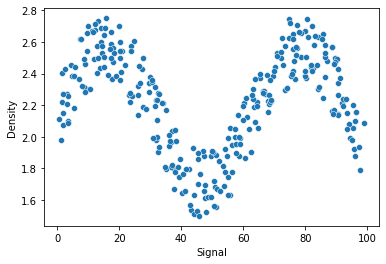

In [4]:
sns.scatterplot(x='Signal', y='Density', data=df)

In [5]:
X = df['Signal'].values.reshape(-1, 1)
y = df['Density']

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [7]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [8]:
lr_pred = lr_model.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [10]:
mean_absolute_error(y_test, lr_pred)

0.211198973318633

In [11]:
mean_squared_error(y_test, lr_pred)

0.0660516726514864

In [12]:
np.sqrt(mean_squared_error(y_test, lr_pred))

0.2570051996584629

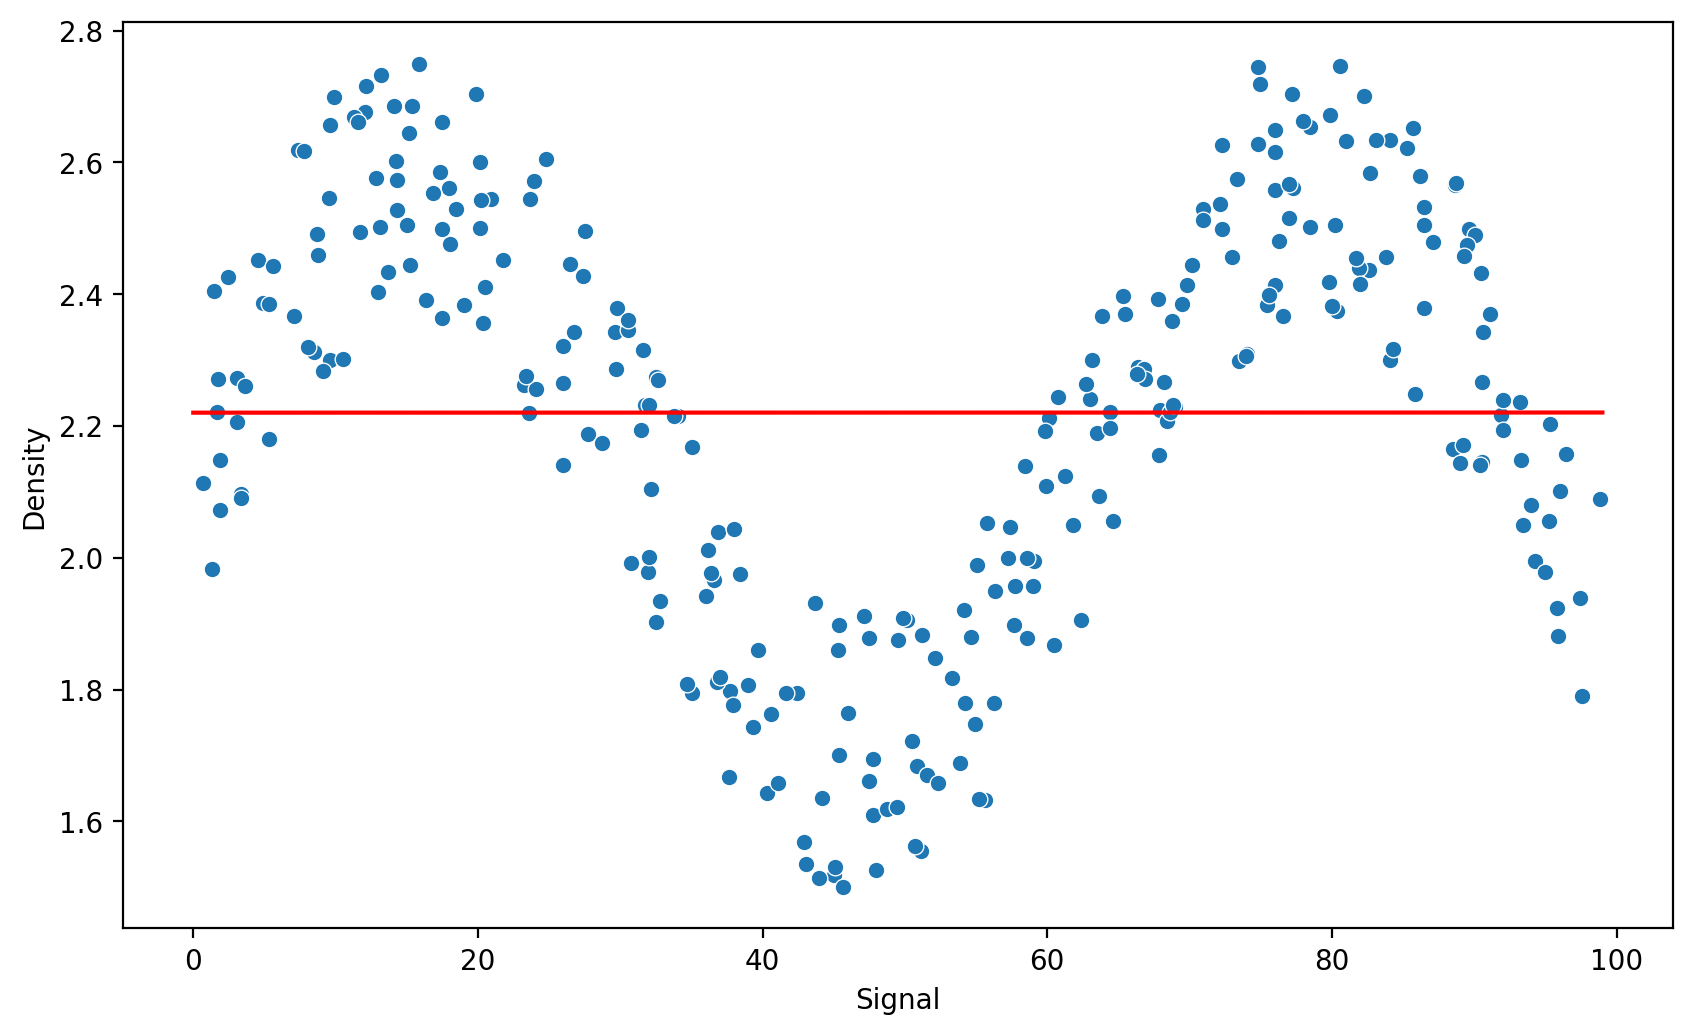

In [15]:
plt.figure(figsize=(10, 6), dpi=200)
sns.scatterplot(x='Signal', y='Density', data=df)

signal_range = np.arange(0, 100)
signal_pred = lr_model.predict(signal_range.reshape(-1, 1))

plt.plot(signal_range, signal_pred, color='red')

In [16]:
def run_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    rmse = np.sqrt(mse)
    
    print('MAE: ', mae)
    print('MSE: ', mse)
    print('RMSE: ', rmse)

    signal_range = np.arange(0, 100)
    signal_pred = model.predict(signal_range.reshape(-1, 1))
    plt.figure(figsize=(10, 6), dpi=200)
    sns.scatterplot(x='Signal', y='Density', data=df)
    plt.plot(signal_range, signal_pred, color='red')

MAE:  0.211198973318633
MSE:  0.0660516726514864
RMSE:  0.2570051996584629


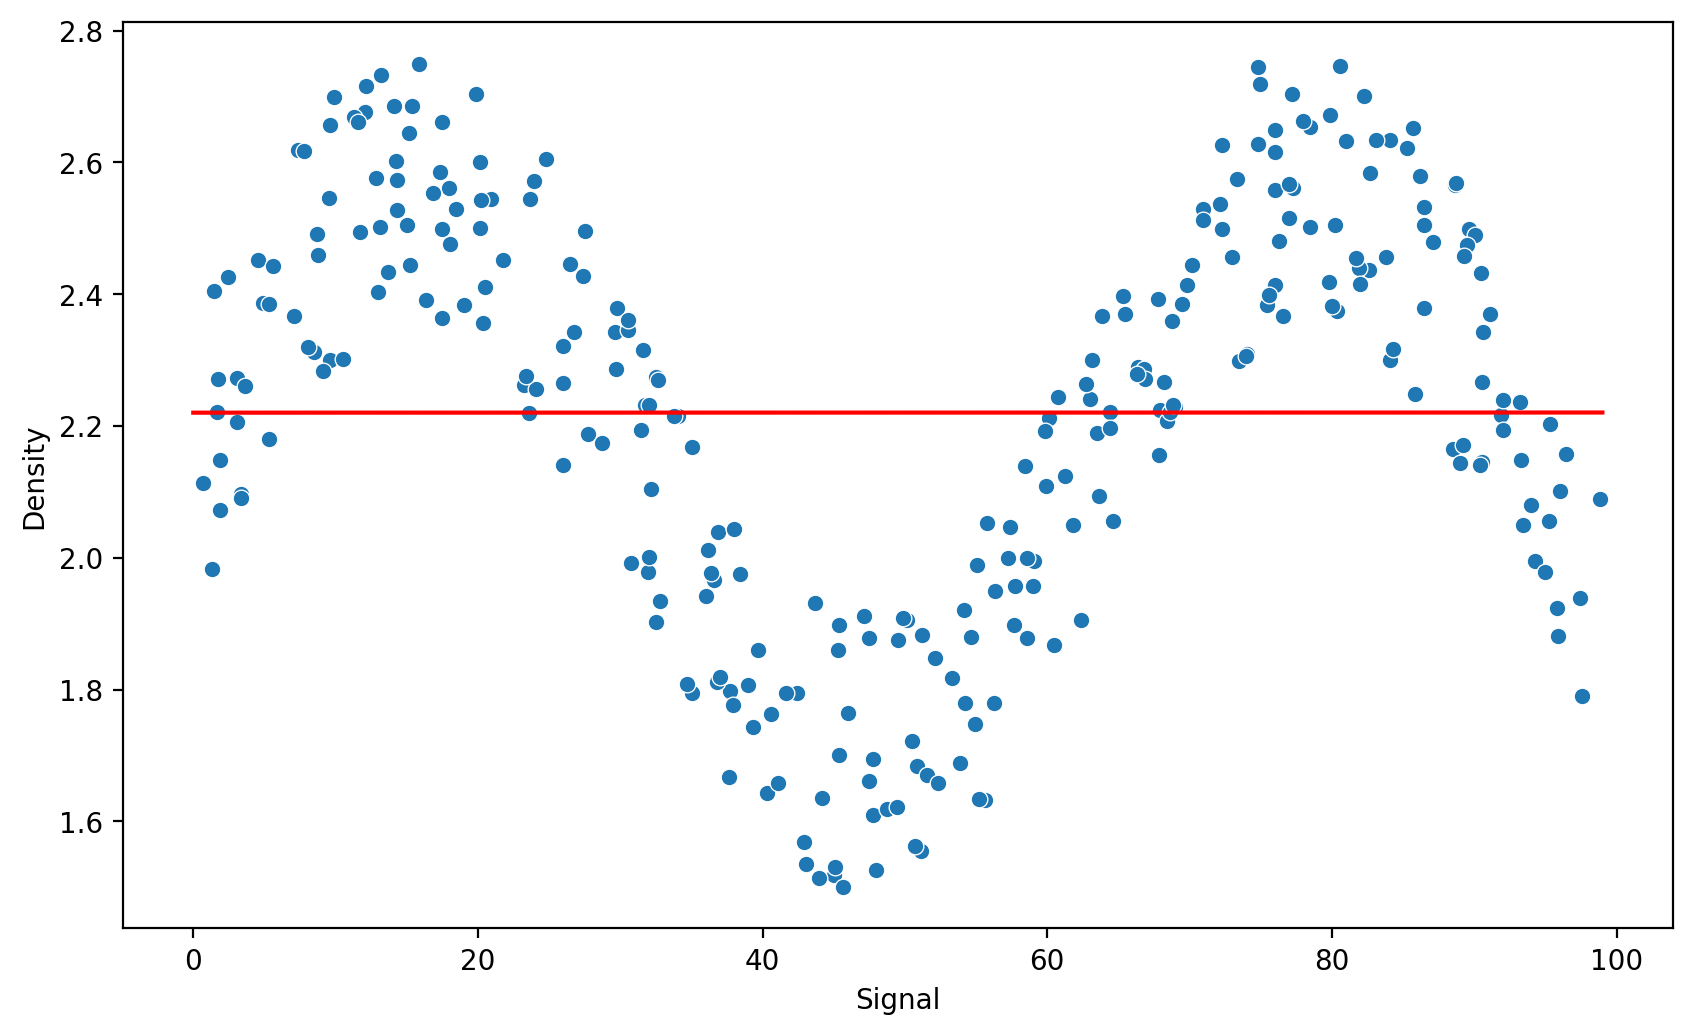

In [17]:
model = LinearRegression()
run_model(model, X_train, X_test, y_train, y_test)

In [18]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

In [19]:
pipe = make_pipeline(PolynomialFeatures(2), LinearRegression())

MAE:  0.22903105443511335
MSE:  0.07937233177859711
RMSE:  0.2817309563725596


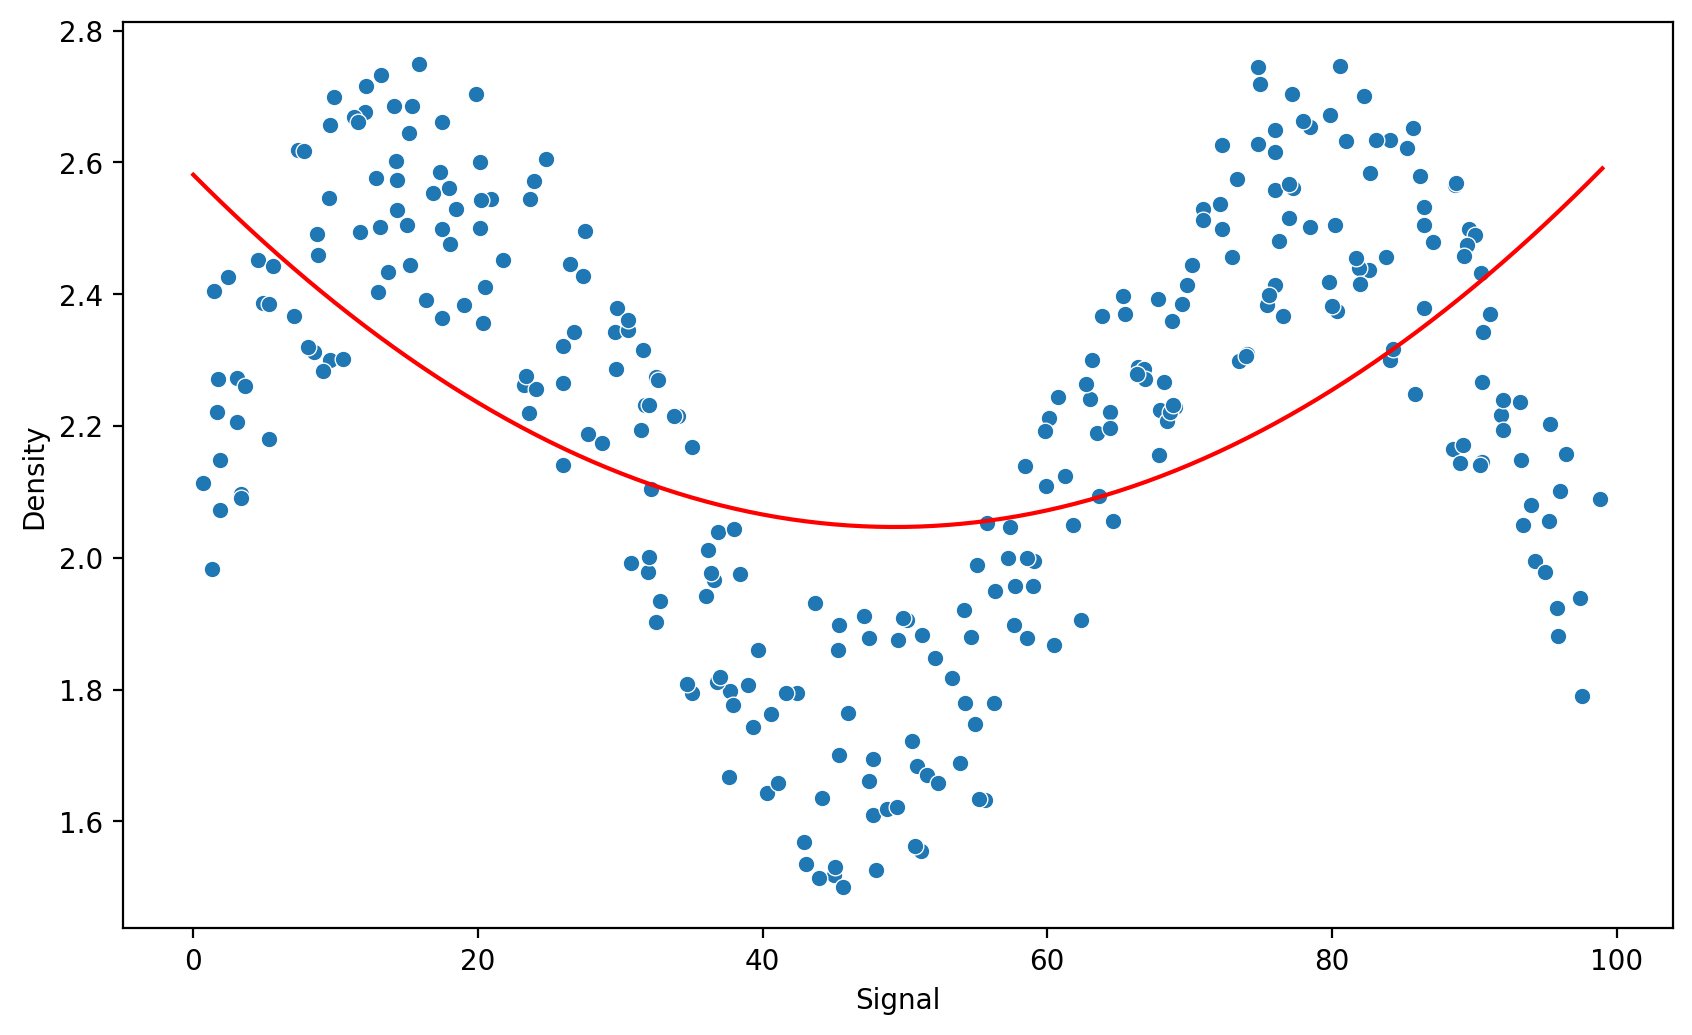

In [20]:
run_model(pipe, X_train, X_test, y_train, y_test)

MAE:  0.1244845793738764
MSE:  0.019631260518898182
RMSE:  0.1401116002295962


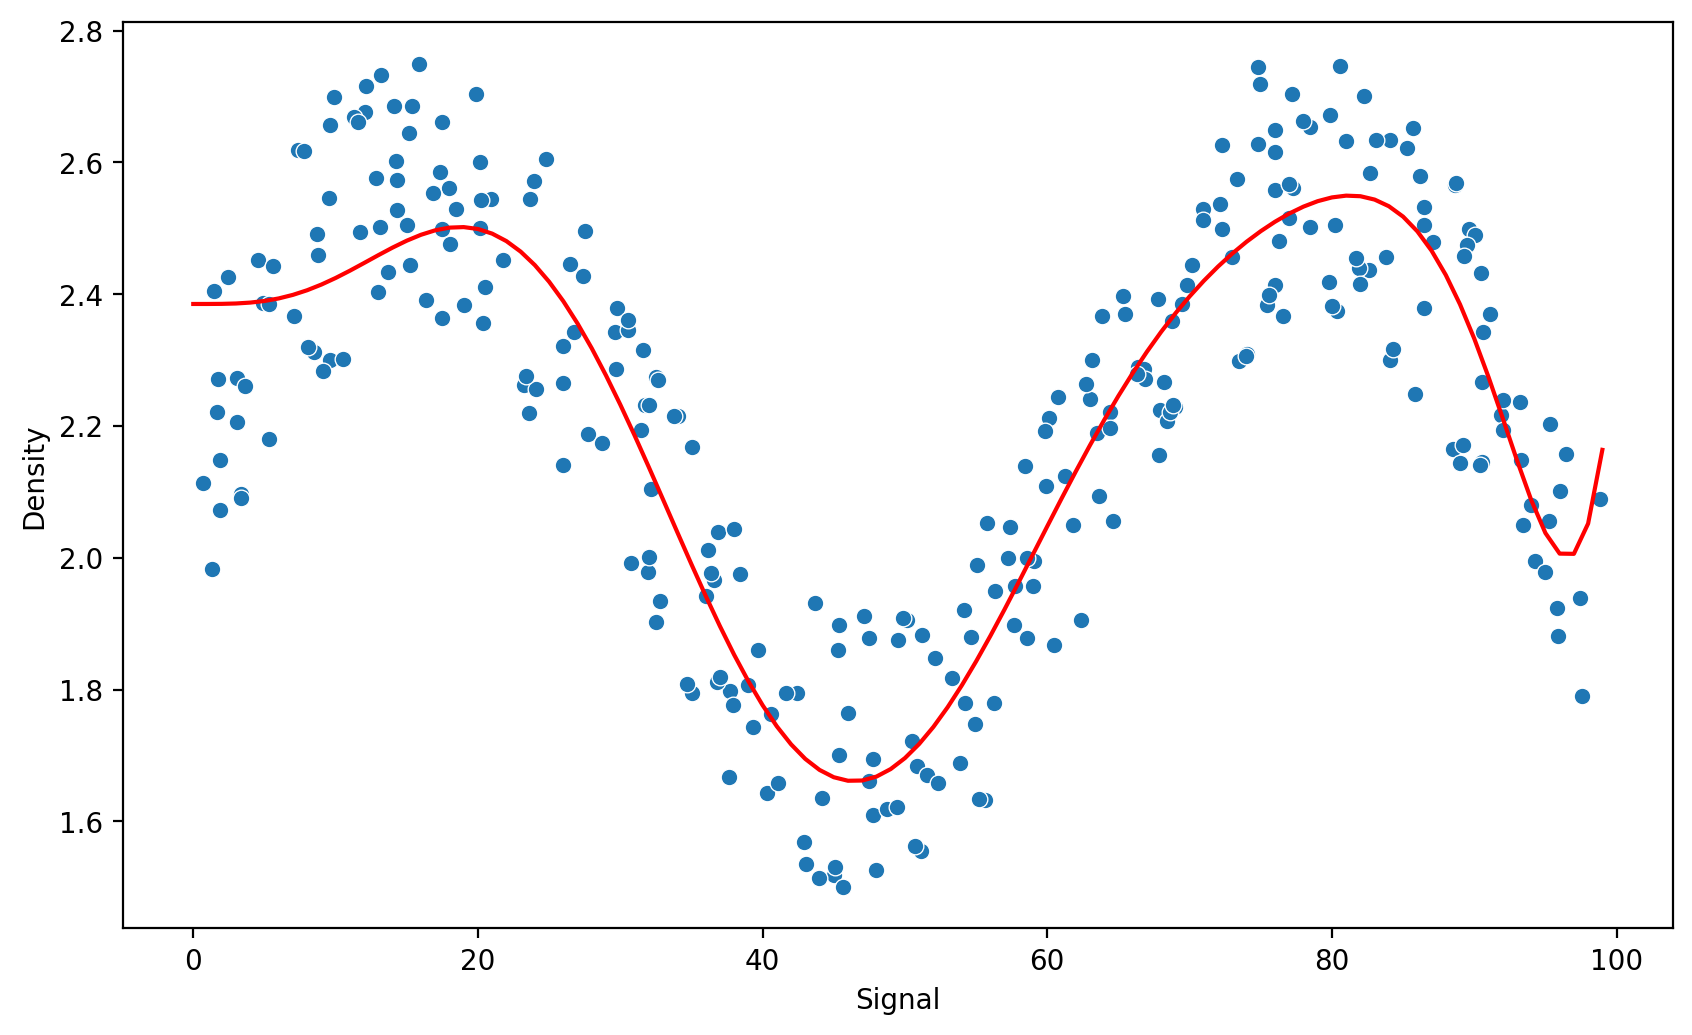

In [21]:
pipe = make_pipeline(PolynomialFeatures(10), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

MAE:  0.11969149629011992
MSE:  0.019064661872548794
RMSE:  0.13807484156264238


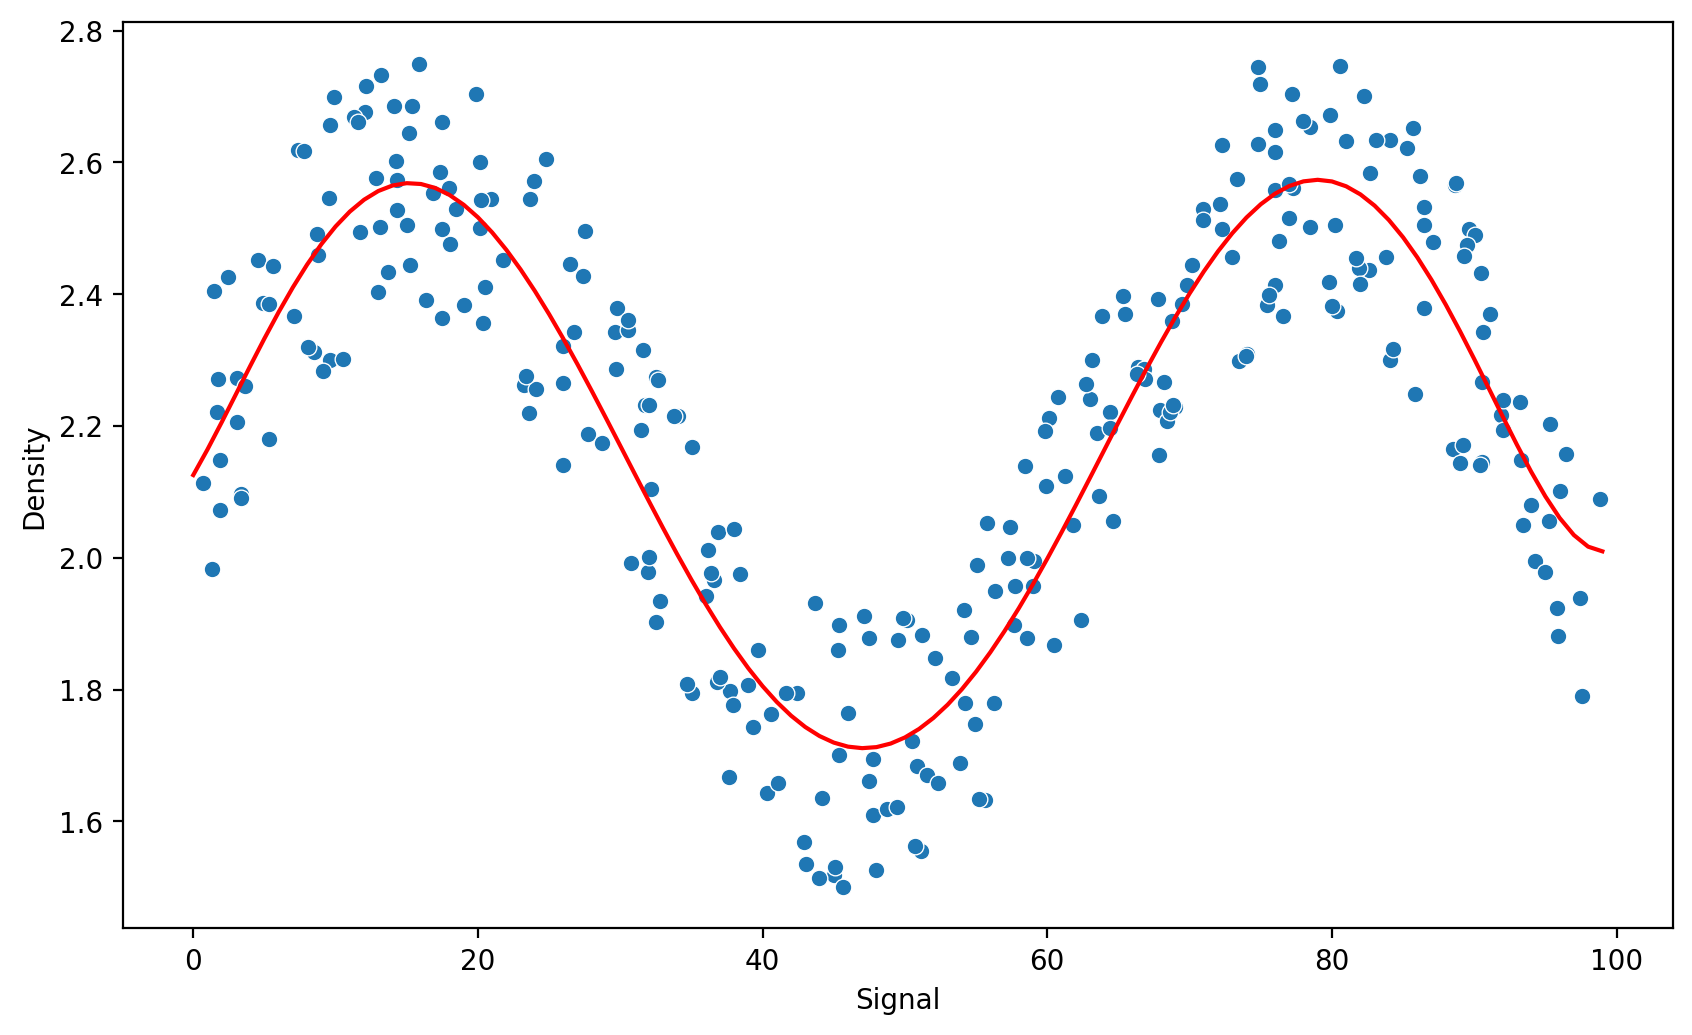

In [22]:
pipe = make_pipeline(PolynomialFeatures(6), LinearRegression())
run_model(pipe, X_train, X_test, y_train, y_test)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

KNN with k =  1
MAE:  0.11877297474442378
MSE:  0.023210127264201276
RMSE:  0.1523487028635337
KNN with k =  5
MAE:  0.12198383614100558
MSE:  0.01885317110339715
RMSE:  0.13730685016923647
KNN with k =  10
MAE:  0.11635971693292672
MSE:  0.017630145285948105
RMSE:  0.13277855732740926


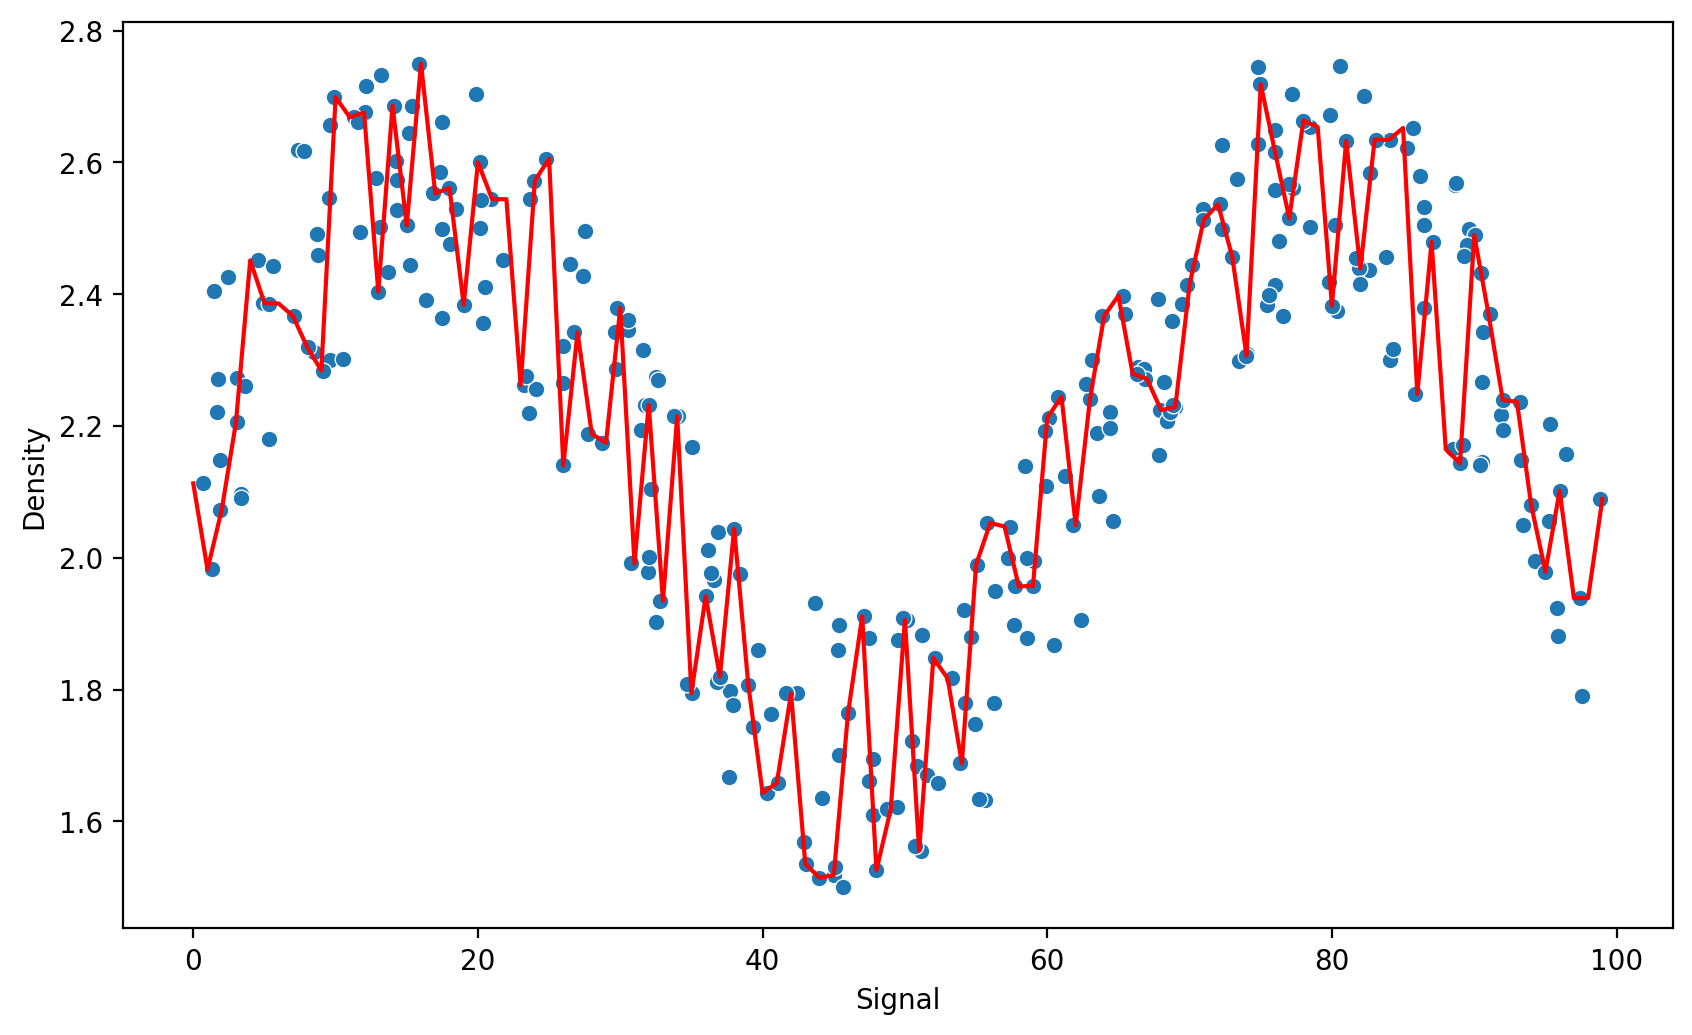

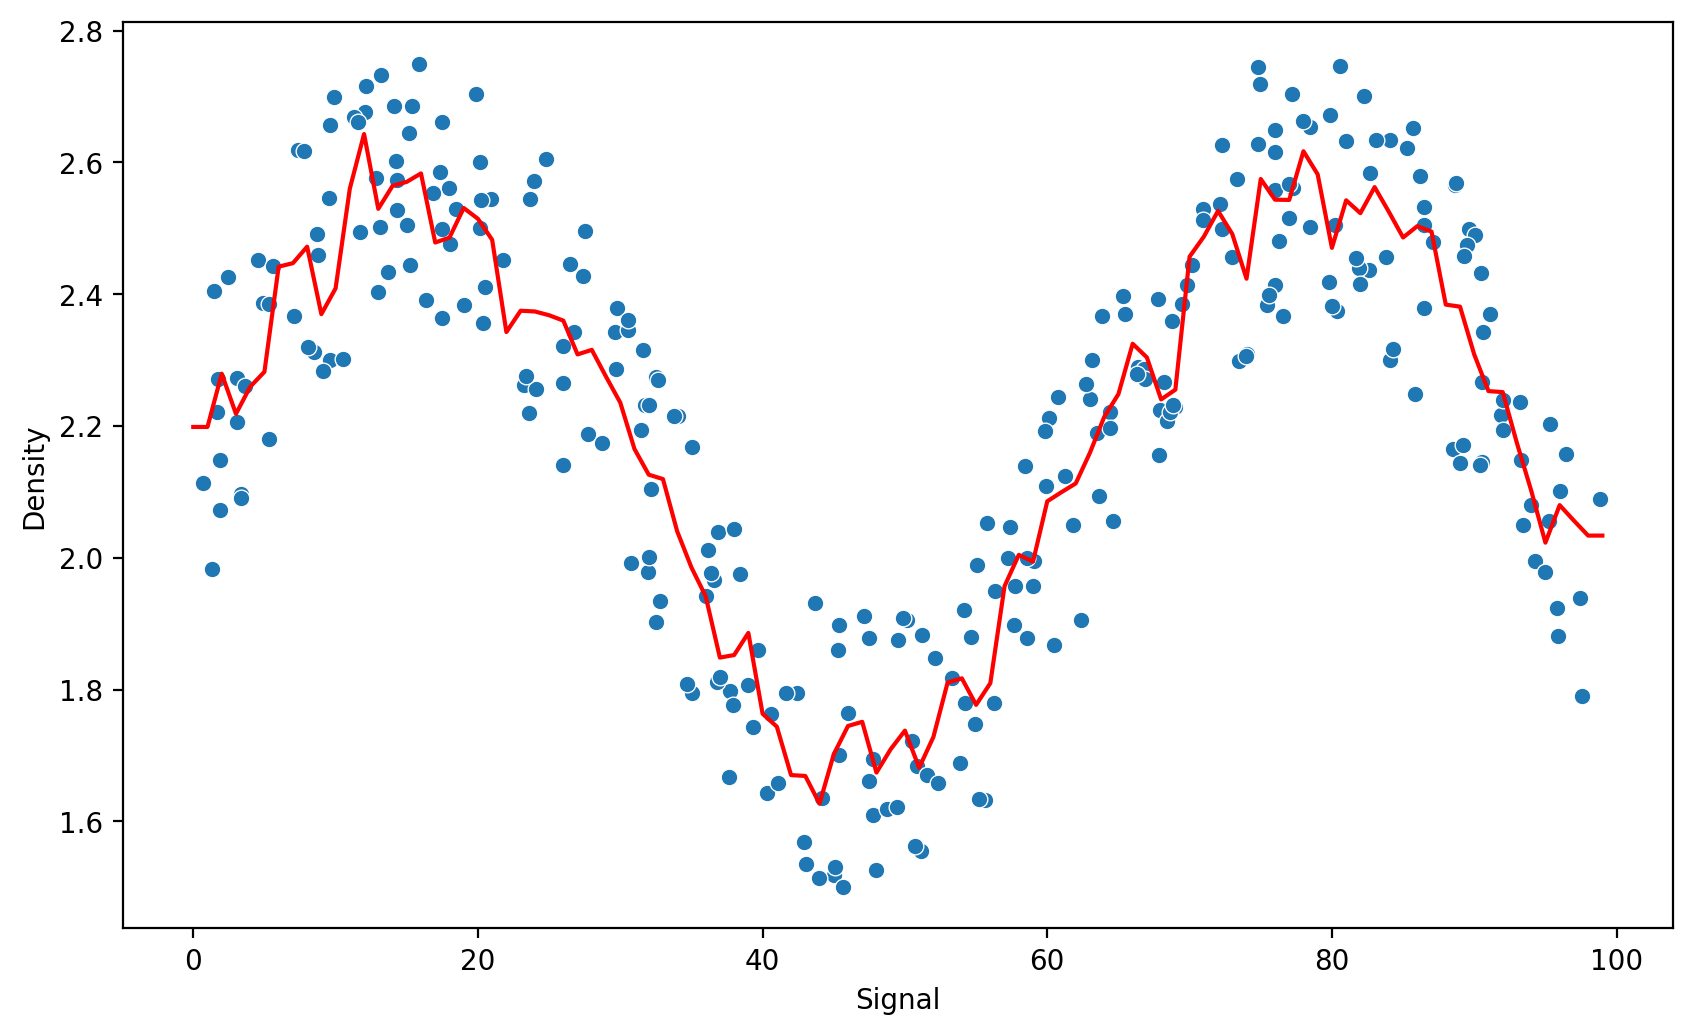

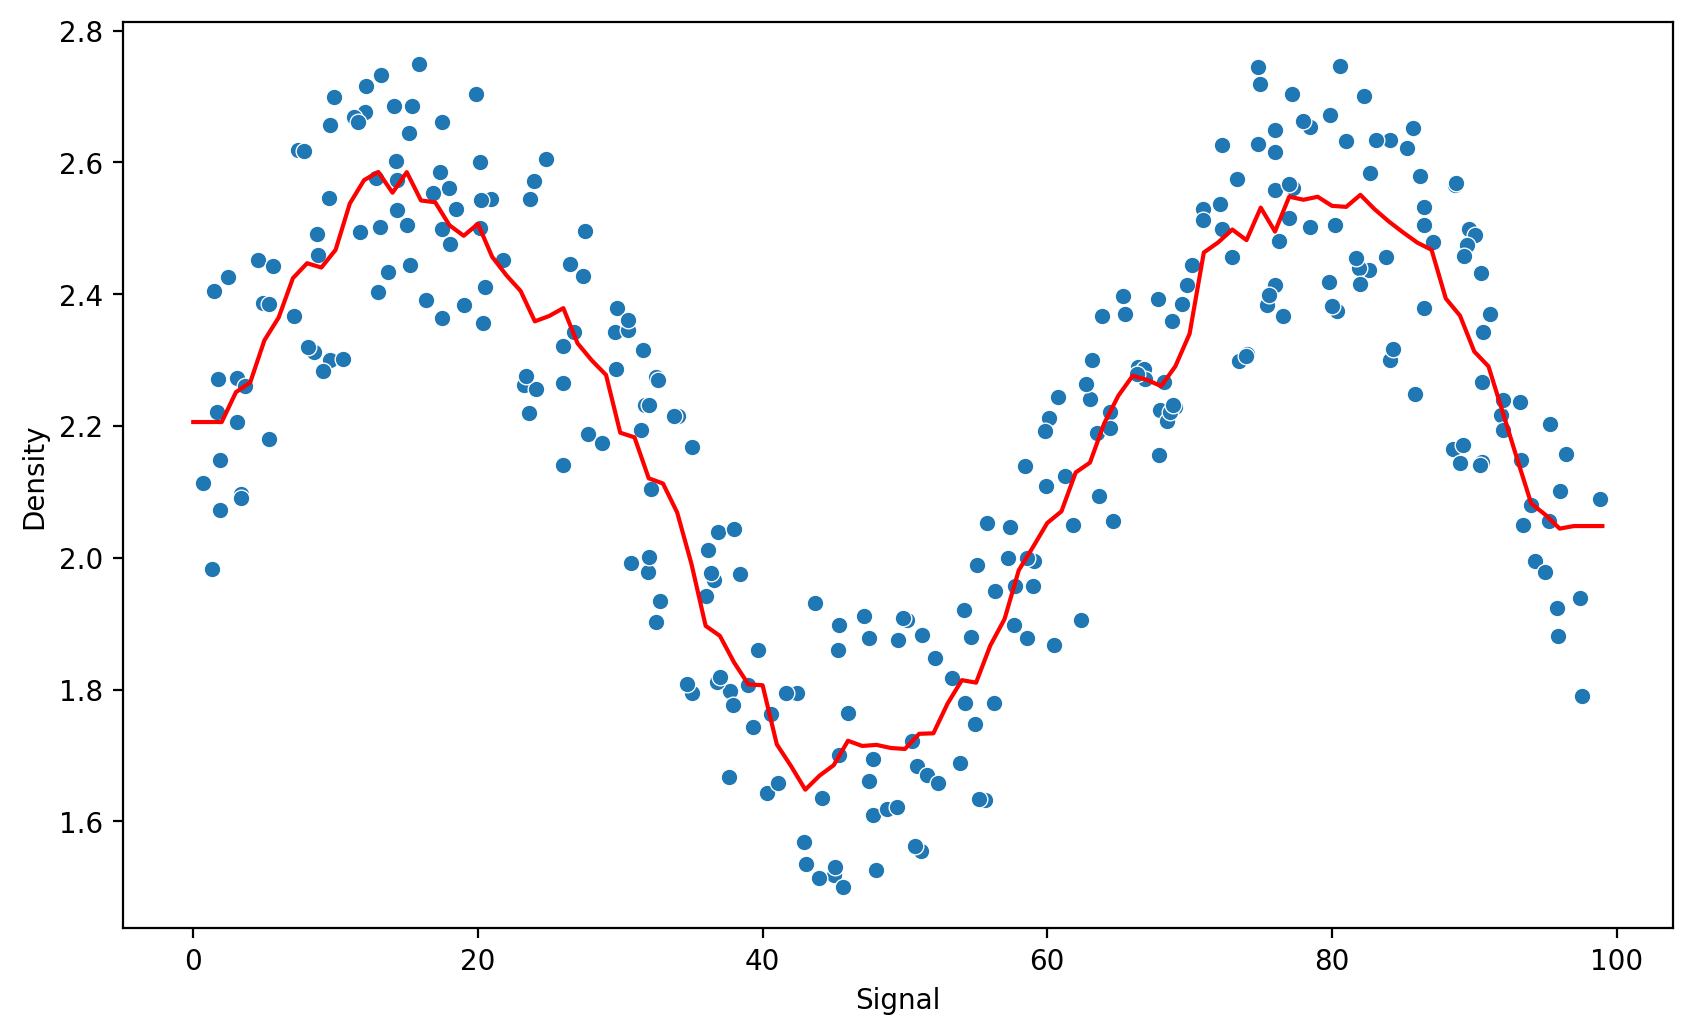

In [24]:
k_values = [1,5,10]
for n in k_values:
    knn = KNeighborsRegressor(n_neighbors=n)
    print('KNN with k = ', n)
    run_model(knn, X_train, X_test, y_train, y_test)

MAE:  0.11877297474442378
MSE:  0.023210127264201276
RMSE:  0.1523487028635337


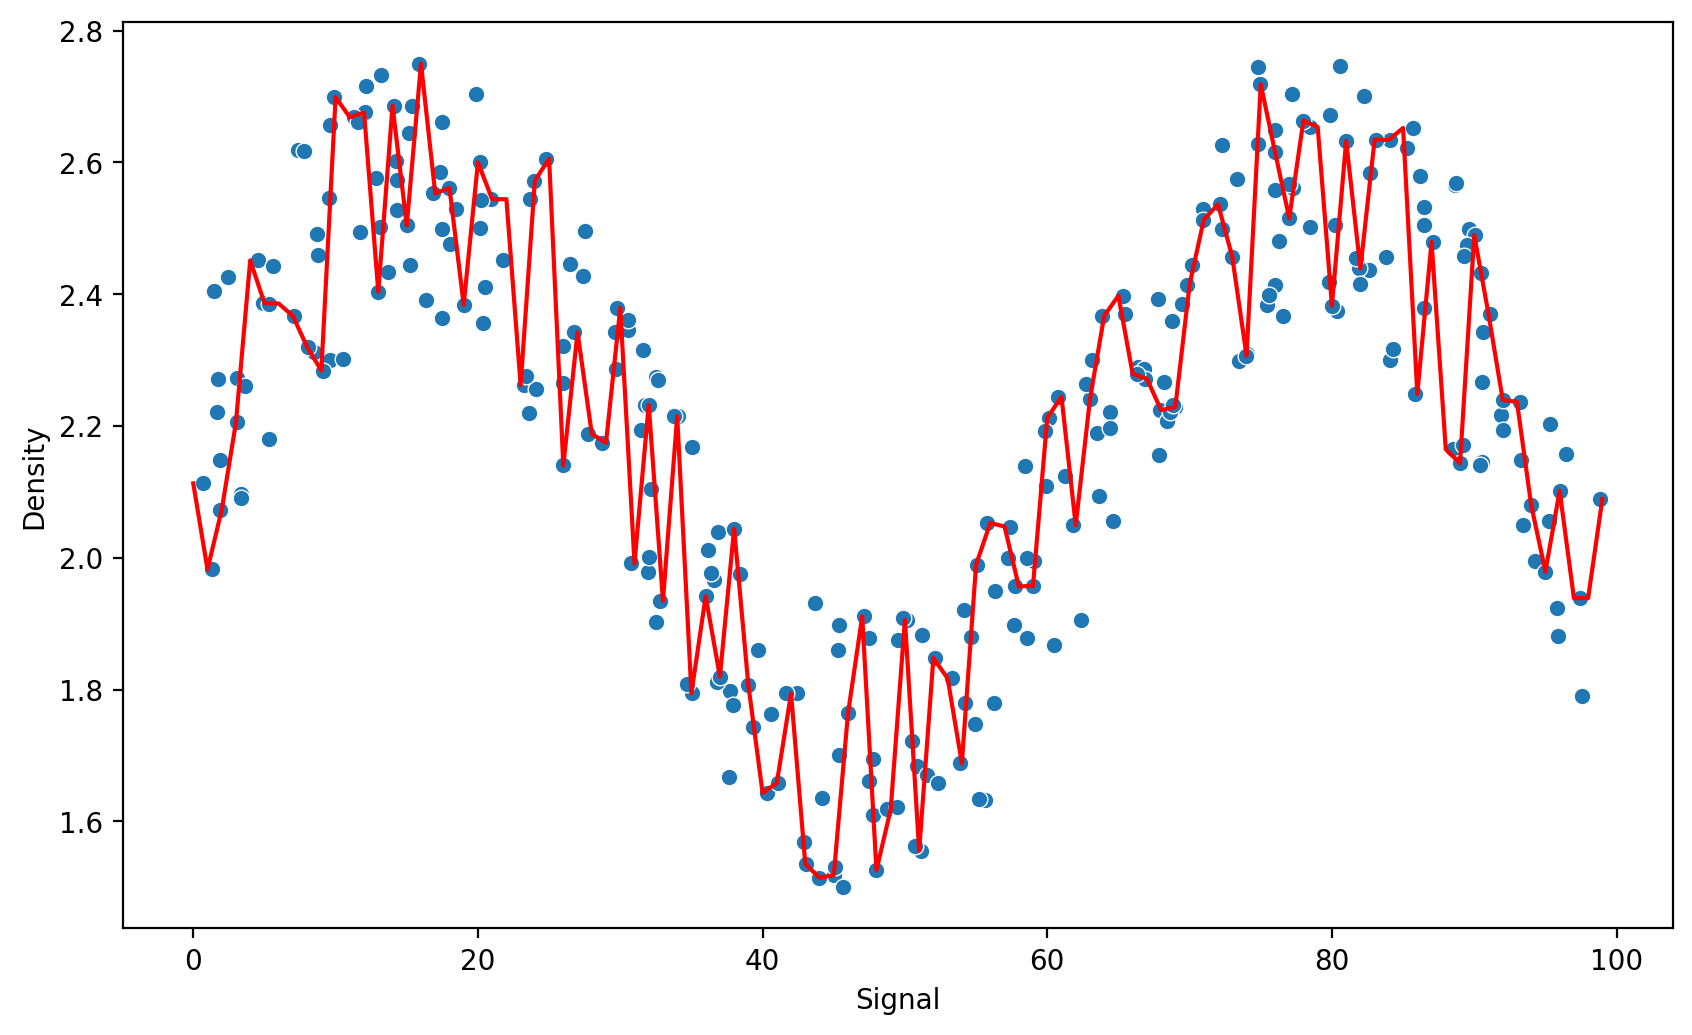

In [25]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
run_model(model, X_train, X_test, y_train, y_test)

In [26]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV


In [28]:
svr = SVR()
param_grid = {'C': [0.01, 0.1, 1, 5, 10, 100, 1000], 'gamma': ['auto', 'scale']}
grid = GridSearchCV(svr, param_grid)

MAE:  0.10854210121348368
MSE:  0.015994659134596963
RMSE:  0.12646999302046696


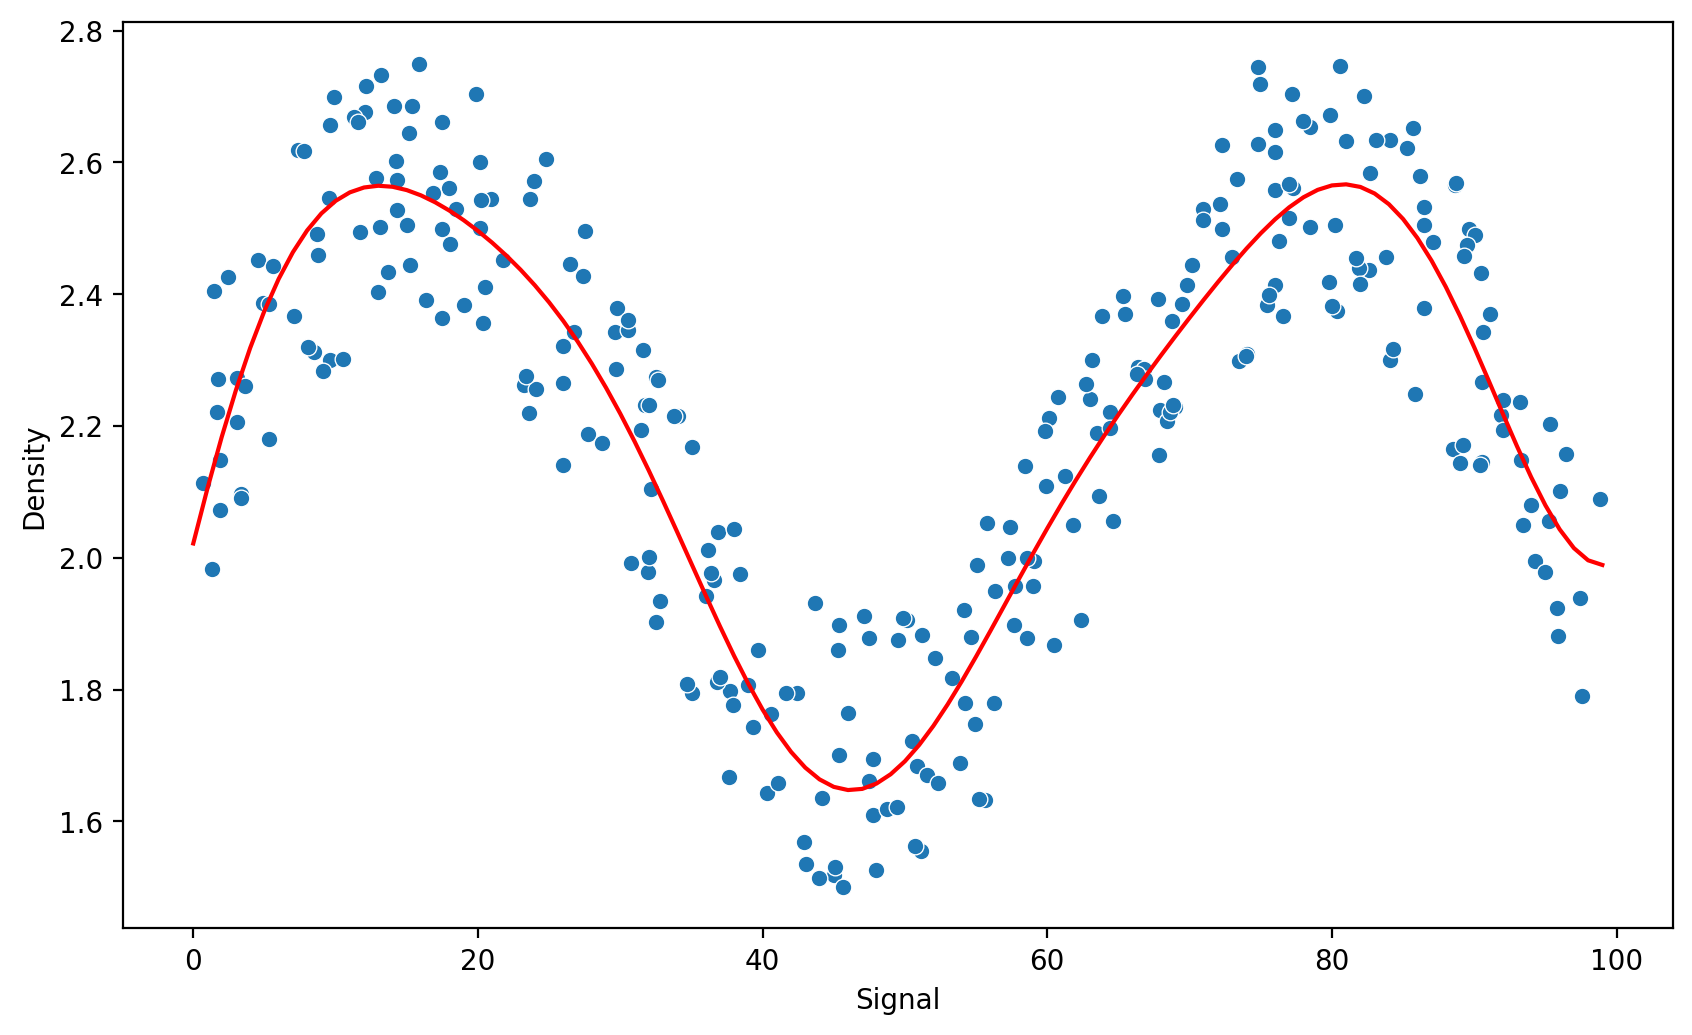

In [29]:
run_model(grid, X_train, X_test, y_train, y_test)

In [30]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=10)

MAE:  0.11999251387890023
MSE:  0.019793980472822548
RMSE:  0.14069108171032926


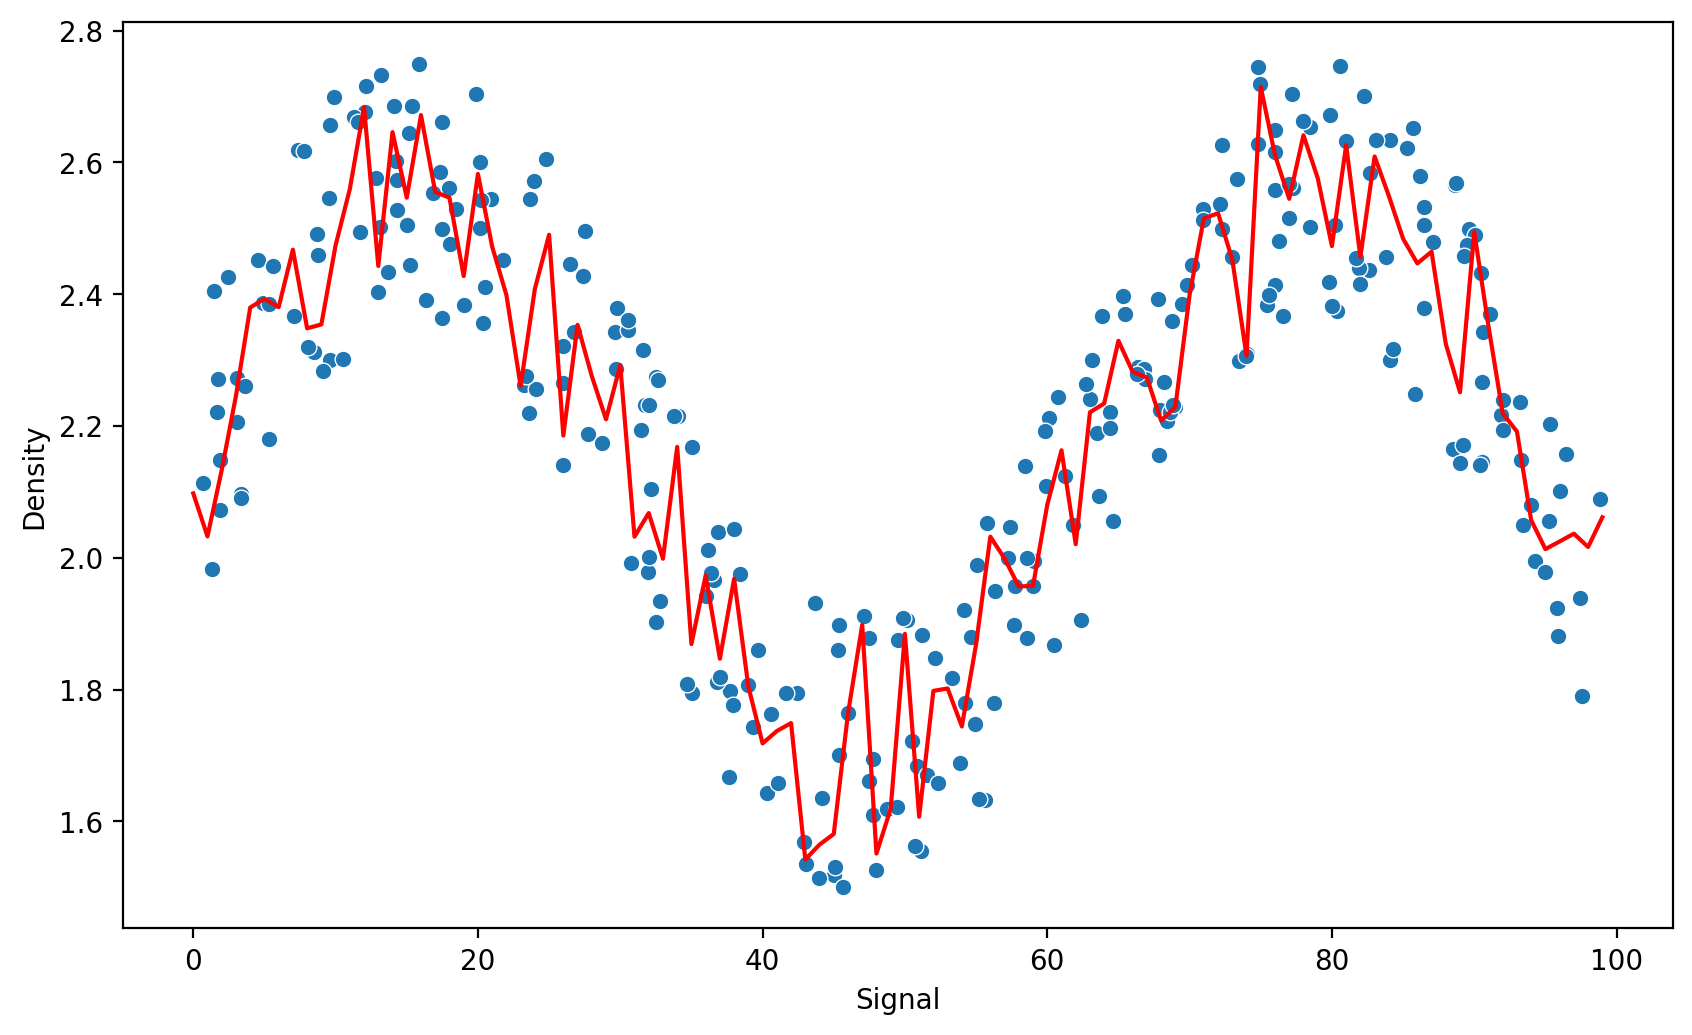

In [31]:
run_model(model, X_train, X_test, y_train, y_test)

MAE:  0.11318284854800689
MSE:  0.01767343883172538
RMSE:  0.13294148649584667


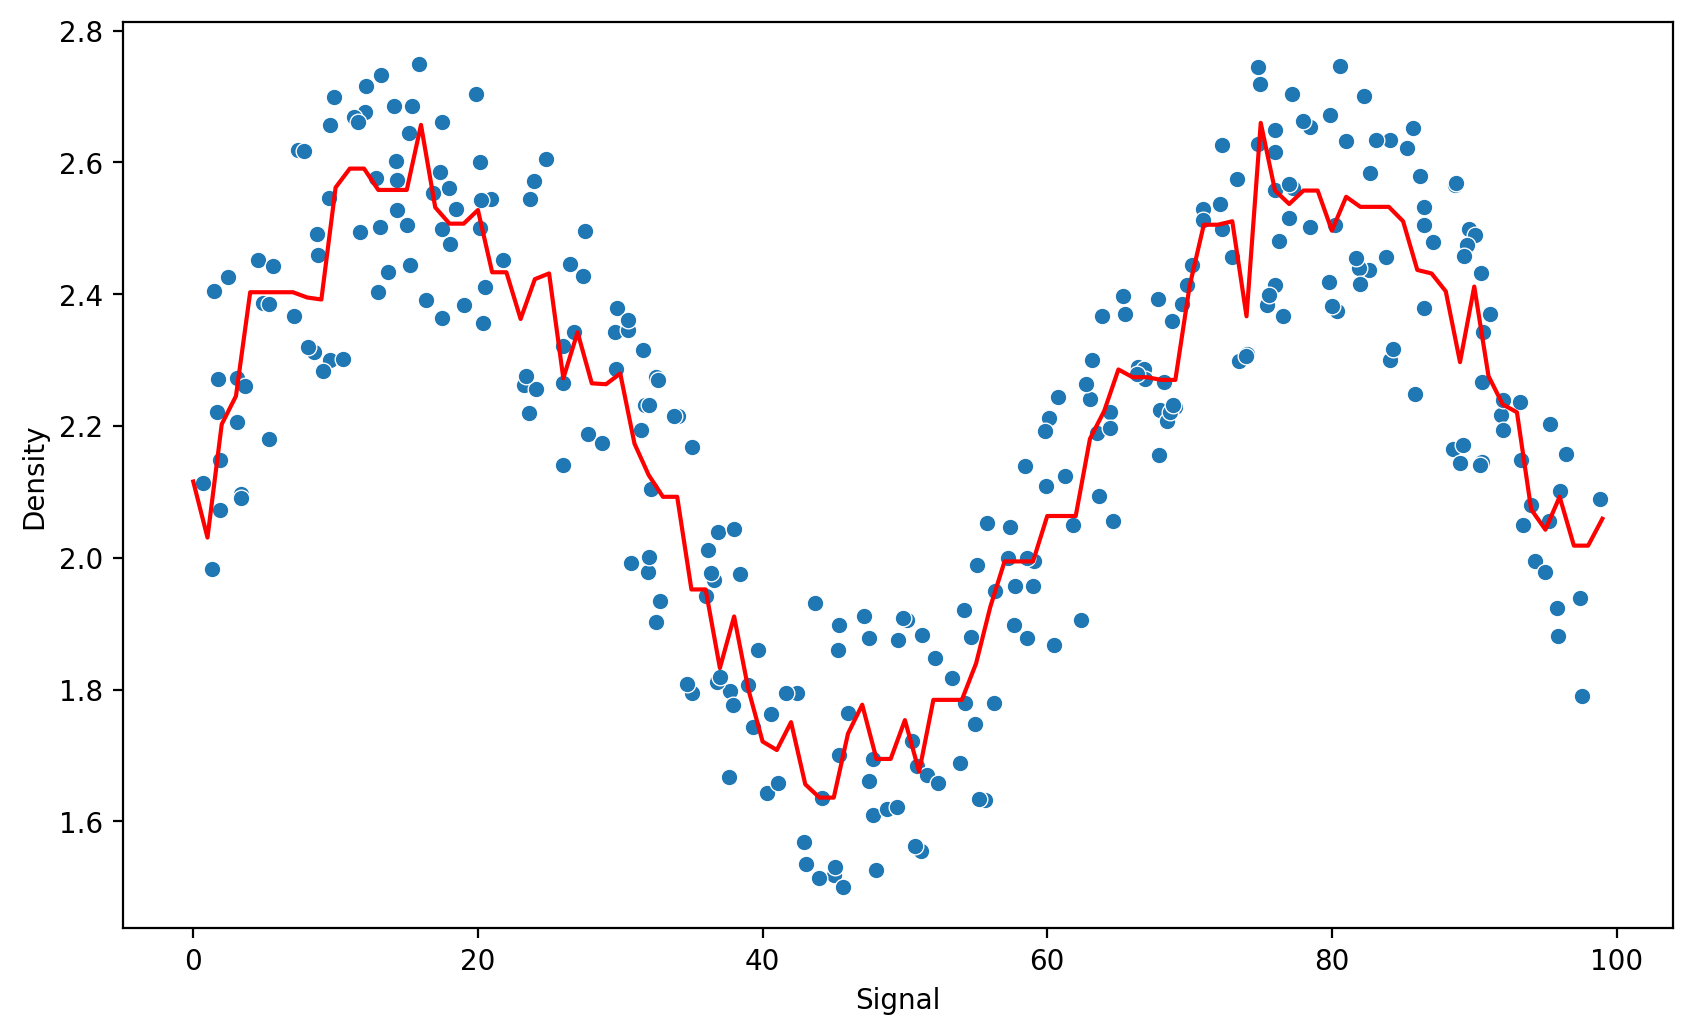

In [32]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
model = GradientBoostingRegressor()
run_model(model, X_train, X_test, y_train, y_test)

MAE:  0.11639542798852977
MSE:  0.01819883042217779
RMSE:  0.1349030408188703


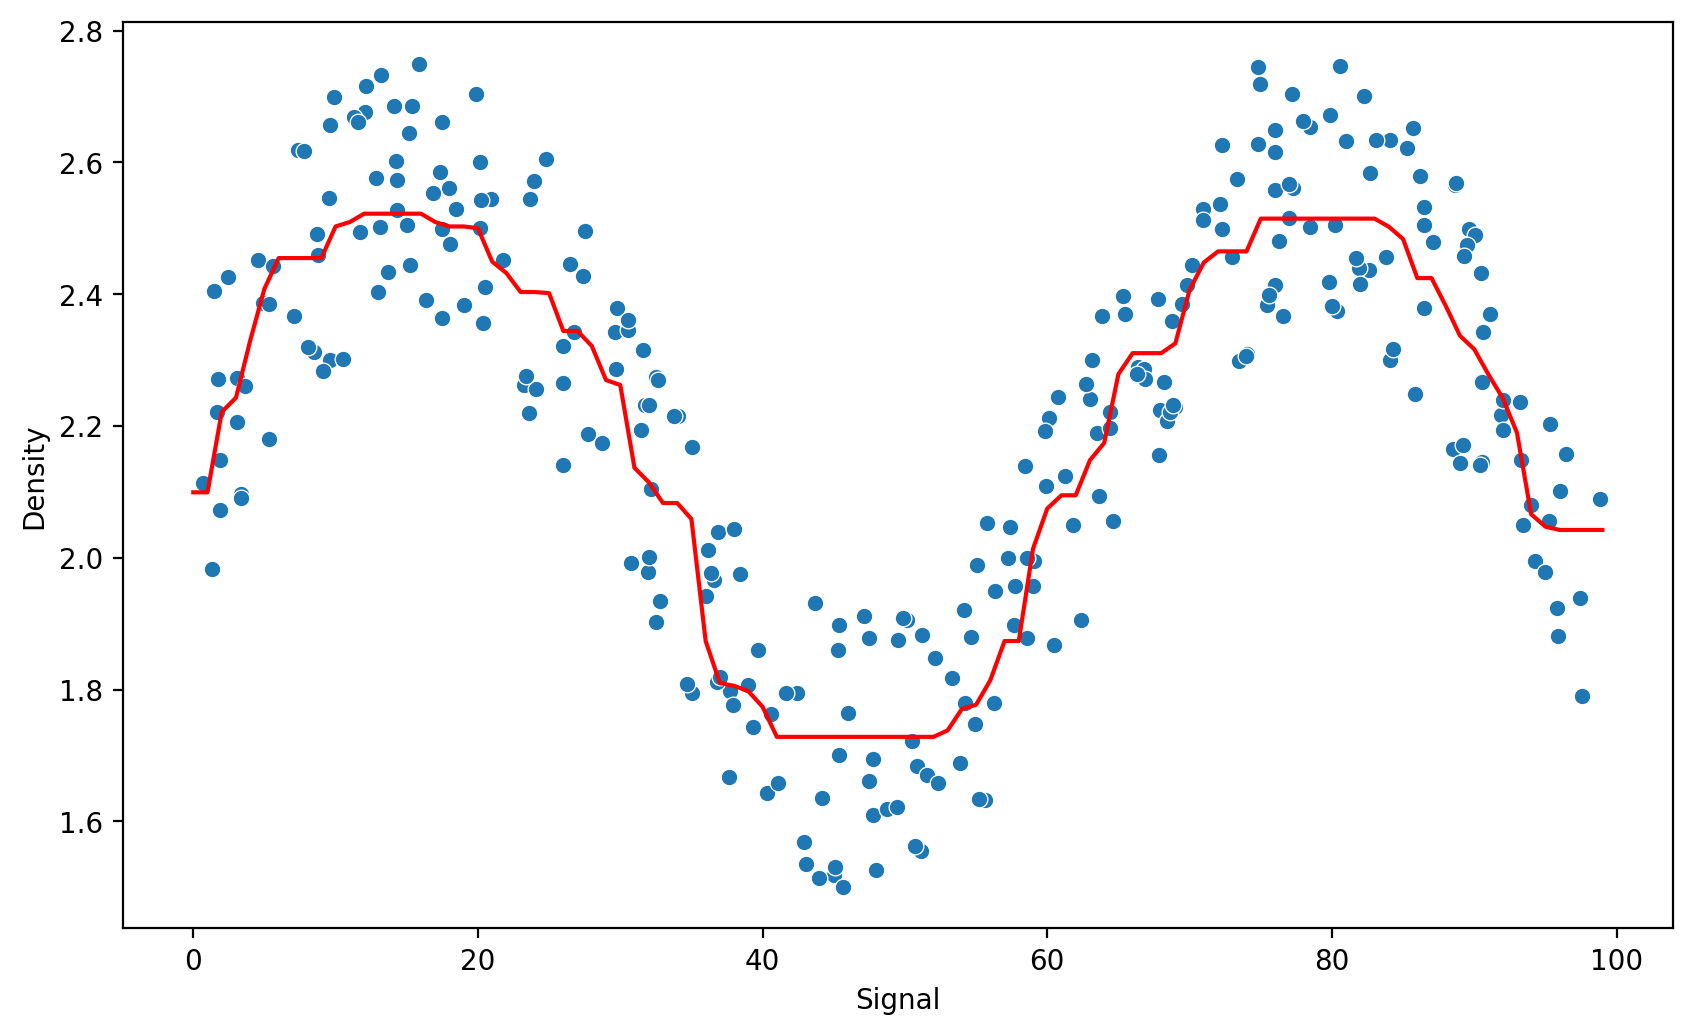

In [33]:
model = AdaBoostRegressor()
run_model(model, X_train, X_test, y_train, y_test)